In [46]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt


#def test_run(test_env,Q_table):

In [47]:

env = gym.make('FrozenLake8x8-v1') #Returns an instance of the environment with wrappers applied.
#test_env = gym.make('FrozenLake8x8-v1')
test_env = gym.make('FrozenLake8x8-v1',render_mode="human")
test_env.metadata['render_fps']=15

In [48]:
Q_table = np.zeros([env.observation_space.n,env.action_space.n]) # Observation Space = 16, Action Space = 4

epsilon = 1 # Agent explores with probability epsilon and exploits with probability (1-epsilon)
epsilon_decay = 0.0001 # Decaying epsilon to favor exploitation later on
alpha = 0.1 # learning rate
discount_factor = 0.99   # In frozen lake, we only have a reward at the end; so immediate rewards don't matter; so don't discount later rewards
episodes = 10000

# List of outcomes to plot
outcomes = []

In [49]:
for run in range(episodes):
    state = env.reset()[0]

    terminated = truncated = False

    outcomes.append("Failure")

    while(not (terminated or truncated)):
        random_sample=random.uniform(0,1)

        if epsilon>random_sample:
            action = env.action_space.sample()  # (E) exploration
        else:
            action = np.argmax(Q_table[state]) # (1-E) exploitation

        next_state, reward, terminated, truncated, info = env.step(action)

        prev_q = Q_table[state, action]
        next_max_q = np.max(Q_table[next_state])
        new_q = (1-alpha)*prev_q + alpha * (reward + discount_factor * next_max_q)
        Q_table[state, action] = new_q
        state = next_state
        
        if reward:
          outcomes[-1] = "Success"
    
    epsilon = max(epsilon - epsilon_decay, 0)


#test_run(env,Q_table)

In [50]:
k=0 # Success counter
for run in range(100):
    state = test_env.reset()[0]
    terminated = truncated = False
    sum=0
    

    while(not (terminated or truncated)):

        action = np.argmax(Q_table[state])

        next_state, reward, terminated, truncated, info = test_env.step(action)

        state = next_state

        sum+=reward
    if sum==1:
        k+=1

In [ ]:
print("\nQ_table : \n\n",Q_table,"\n\n")
print(f"Test success rate = {k}%")


Q_table : 

 [[3.89439932e-01 3.91427797e-01 3.89047080e-01 3.89505483e-01]
 [3.98486589e-01 3.97549700e-01 3.98183271e-01 4.00276433e-01]
 [4.14266467e-01 4.14310542e-01 4.18988556e-01 4.14265774e-01]
 [4.34309072e-01 4.33367207e-01 4.34543162e-01 4.41105313e-01]
 [4.53677970e-01 4.53998054e-01 4.61189375e-01 4.53804679e-01]
 [4.75331914e-01 4.74391678e-01 4.95775524e-01 4.75367968e-01]
 [4.97727081e-01 4.96542233e-01 5.28448841e-01 4.96787764e-01]
 [5.01001260e-01 5.33294750e-01 5.01023175e-01 5.01095420e-01]
 [3.85451291e-01 3.86141764e-01 3.79078692e-01 3.86695324e-01]
 [3.90527296e-01 3.91382651e-01 3.90370728e-01 3.90341651e-01]
 [3.98550733e-01 4.03249681e-01 4.04669091e-01 4.12103936e-01]
 [2.50958591e-01 3.28842397e-01 2.73936099e-01 4.33631587e-01]
 [4.35757425e-01 4.33120548e-01 4.42976700e-01 4.54404259e-01]
 [4.64238896e-01 4.65093452e-01 4.64018703e-01 4.94572670e-01]
 [5.01395617e-01 5.02524744e-01 5.36881759e-01 5.02307809e-01]
 [5.09275659e-01 5.52387132e-01 5.0944911

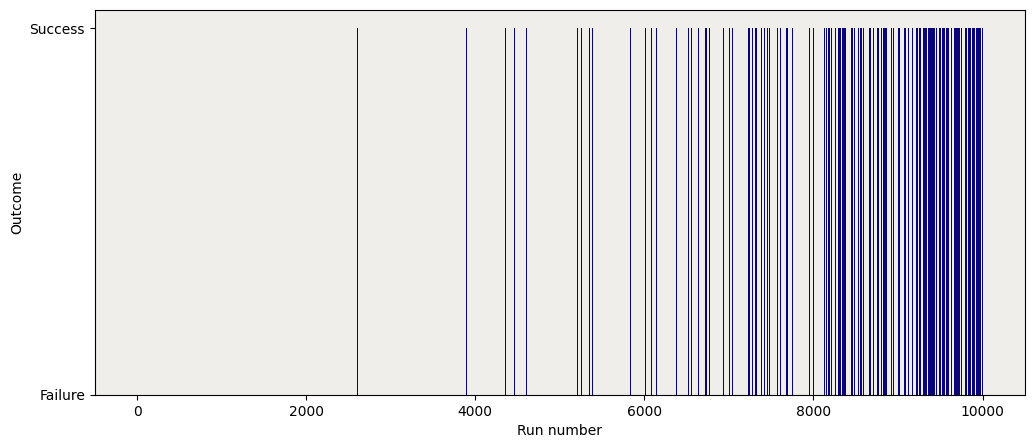

In [44]:
# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()